In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data[:, 2:]
y = iris.target

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42) #트리에 대한 설정을 주는 과정. 만약 id3로 하고 싶으면 criterion='entropy' 쓰면 된다.
tree_clf.fit(X, y) #주어진 설정에 데이터를 넣어서 트리를 만드는 것

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [5]:
from sklearn.tree import export_graphviz #트리 가지고 그림 만들기

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=["petal length (cm)", "petal width (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

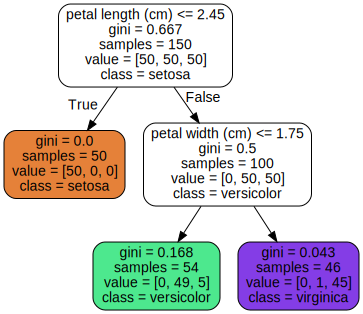

In [6]:
import graphviz #만든 그림을 png파일로 만들기
with open("iris_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='images/decision_trees', cleanup=True)
dot

In [7]:
?iris

Type:        Bunch
String form:
{'data': array([[5.1, 3.5, 1.4, 0.2],
           [4.9, 3. , 1.4, 0.2],
           [4.7, 3.2, 1.3, 0.2],
           <...> ogramData\\Anaconda3\\envs\\nims-academy\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'}
Length:      6
File:        c:\programdata\anaconda3\envs\nims-academy\lib\site-packages\sklearn\utils\__init__.py
Docstring:  
Container object for datasets

Dictionary-like object that exposes its keys as attributes.

>>> b = Bunch(a=1, b=2)
>>> b['b']
2
>>> b.b
2
>>> b.a = 3
>>> b['a']
3
>>> b.c = 6
>>> b['c']
6


In [8]:
tree0_result=[]
tree0_acc=[]
tree0_error=[]
for i in range(150) :
    if iris.data[i][2] <=2.45 :
        a=0
    elif iris.data[i][3] <=1.75 :
        a=1
    else :
        a=2
    tree0_result.append(a)
    if a==iris.target[i] :
        tree0_acc.append(1)
    else :
        tree0_acc.append(0)
        tree0_error.append(i)

tree0_acc_rate = sum(tree0_acc)/150 * 100   

print (tree0_acc_rate,'%')
print (tree0_error)

96.0 %
[70, 106, 119, 129, 133, 134]


# 랜덤 포레스트

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import itertools

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [16]:
# 기존에 가지고 있던 data를 training set과 test set으로 나눠보자

len(X)

150

In [37]:
idx =[]

for i in list(range(20)) :
    a=int(np.random.random()*150)
    k=0
    for j in list(range(len(idx))) :
        if idx[j]==a :
            i-=1
            k=1
    if k==0 : idx.append(a)
    
idx.sort()

idx

[16,
 19,
 22,
 28,
 34,
 59,
 60,
 63,
 67,
 91,
 98,
 107,
 113,
 118,
 125,
 127,
 130,
 138,
 145]

In [38]:
9 in idx

False

In [41]:
X_train=[]
y_train=[]
X_test=[]
y_test=[]

for i in list(range(150)) :
    if i in idx :
        X_test.append(X[i])
        y_test.append(y[i])
    else :
        X_train.append(X[i])
        y_train.append(y[i])
    
len(X_train)

131

In [42]:
clf = RandomForestClassifier(n_estimators=300, random_state=11, oob_score= True, n_jobs=-1)

In [43]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=True, random_state=11, verbose=0, warm_start=False)

In [44]:
clf.oob_score_

0.9541984732824428

In [45]:
prediction = clf.predict(X_test)

In [46]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8

   micro avg       1.00      1.00      1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [47]:
clf.score(X_test, y_test)#len([i for i, j in zip(y_test, prediction) if np.all(i == j)])/len(y_test)

1.0

In [48]:
print(classification_report([0, 0, 1, 1, 1, 0], [0, 1, 1, 0, 0, 0]))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.50      0.33      0.40         3

   micro avg       0.50      0.50      0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



feature 중요도

In [49]:
clf.feature_importances_

array([0.47100896, 0.52899104])

In [50]:
np.argmax(clf.feature_importances_)

1

In [52]:
clf.feature_importances_[1]

0.528991035678091